In [1]:
from pathlib import Path

import pyparsing as pp

mess_inp_file = Path("01_1-32_mess.inp")
spc_file = Path("species.csv")

In [2]:
from mess_io_proto import surface

surf = surface.from_mess(mess_inp_file, spc_inp=spc_file)
surf = surface.with_energies_relative_to(surf, 28)
surf = surface.without_fake_wells(surf)
# surface.display_network(surf)

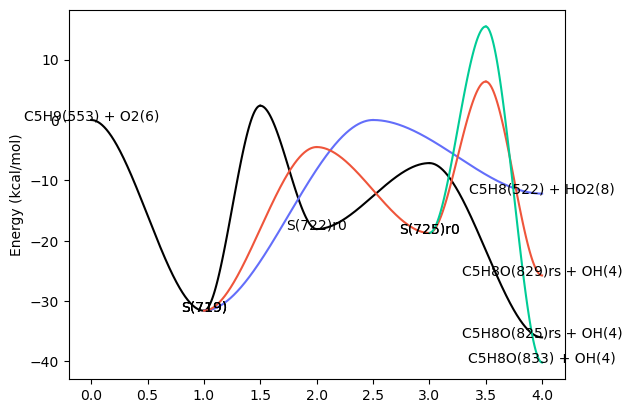

<Figure size 1000x500 with 0 Axes>

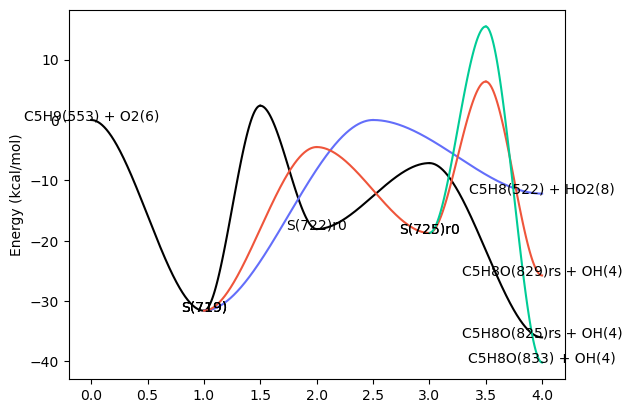

In [3]:
from matplotlib import pyplot

size = (10, 5)
fig = pyplot.figure(figsize=size)
fig = pyplot.figure()

surface.plot_connected_paths(
    surf, [[28, 0, 1, 22], [28, 0, 21], [28, 0, 3, 23], [28, 0, 3, 20]], fig=fig
)

In [4]:
import numpy

coords = numpy.array([0, 1, numpy.nan, 2, numpy.nan, 4])
nan = numpy.isnan(coords)
miss_idxs, = numpy.nonzero(nan)
good_idxs, = numpy.nonzero(~nan)
print(good_idxs)
print(miss_idxs)
print(coords[~nan])
coords[nan] = numpy.interp(miss_idxs, good_idxs, coords[~nan])
print(coords)

[0 1 3 5]
[2 4]
[0. 1. 2. 4.]
[0.  1.  1.5 2.  3.  4. ]


In [5]:
# path0 = surface.path_from_well_id_sequence(surf, [28, 0, 1, 22])
# path1 = surface.path_from_well_id_sequence(surf, [28, 0, 21])
# path1

In [6]:
# from importlib import reload

# from matplotlib import pyplot

# reload(surface)


# size = (10, 5)
# fig = pyplot.figure(figsize=size)
# fig = pyplot.figure()

# data0 = list(enumerate(path0))
# data1 = list(enumerate(path1))
# fig = surface.plot_path_data(data0, fig=fig, amchi_mapping=surf.amchi_mapping)
# fig = surface.plot_path_data(
#     data1, fig=fig, amchi_mapping=surf.amchi_mapping, color="red"
# )